In [1]:
import pandas as pd
import numpy as np

true_path = 'true/True.csv'
fake_path = 'fake/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [7]:
# add labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
# inspect length of news
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


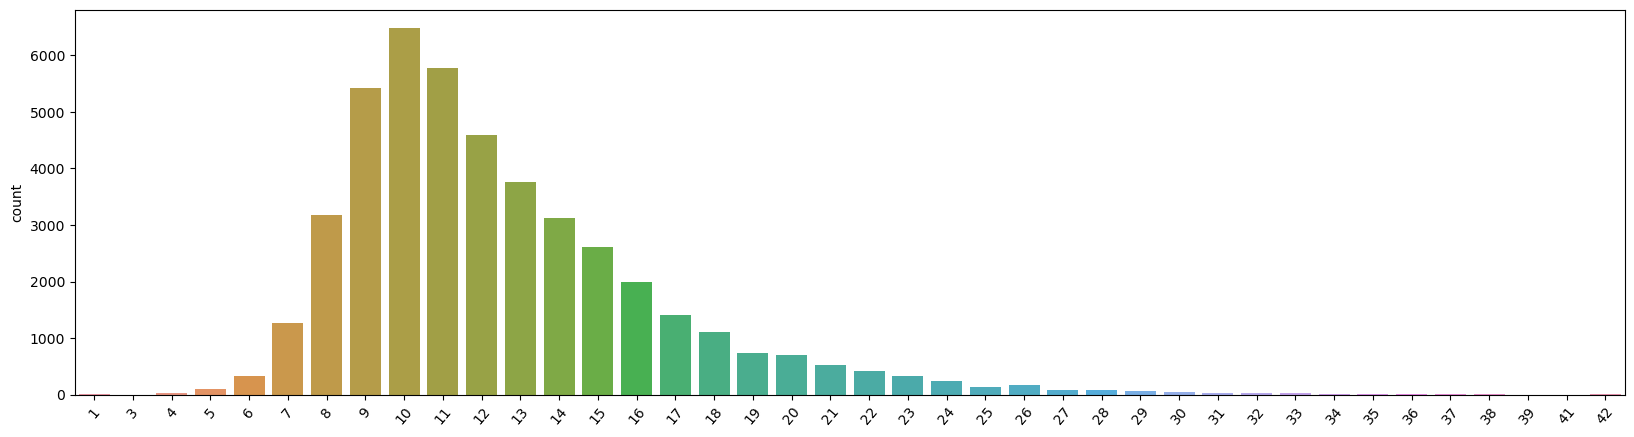

In [11]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [13]:
# purify and shuffle the DataFrame
from sklearn.utils import shuffle

# purify
df = df.iloc[:,[0,-1]]

# shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Obama’s Epic Win Vs Ebola The Media Never Tol...,0
1,Senate Judiciary committee wants Donald Trump ...,1
2,Great Britain’s Government Just Issued An EPI...,0
3,"Russia's Lavrov, U.S.'s Tillerson to meet Augu...",1
4,Senate's McConnell: Draft healthcare bill expe...,1
...,...,...
44893,(VIDEO) PANTSUIT ON FIRE! HILLARY CLINTON CAUG...,0
44894,Immigrant 'Dreamers' - and their bosses - wait...,1
44895,Former Virginia Governor Gilmore drops Republi...,1
44896,Spicer Wears National Symbol Of ‘Distress’ On...,0


In [14]:
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

trainset size: (35918, 2)
valset size: (8980, 2)


In [15]:
# DataFrame to csv

train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)